## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df_clean = pd.read_csv('data/cleaned_kc_house_data.csv')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21597 non-null  float64
 1   bedrooms           21597 non-null  int64  
 2   bathrooms          21597 non-null  float64
 3   sqft_living        21597 non-null  int64  
 4   sqft_lot           21597 non-null  int64  
 5   floors             21597 non-null  float64
 6   sqft_above         21597 non-null  int64  
 7   yr_built           21597 non-null  int64  
 8   yr_renovated       21597 non-null  float64
 9   zipcode            21597 non-null  int64  
 10  lat                21597 non-null  float64
 11  long               21597 non-null  float64
 12  sqft_living15      21597 non-null  int64  
 13  sqft_lot15         21597 non-null  int64  
 14  sqft_basment_calc  21597 non-null  int64  
 15  grades             21597 non-null  float64
 16  waterfront         215

In [5]:
y = df_clean['price']
X = df_clean.drop('price', axis=1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Run this cell without changes
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 16197 rows and 17 columns
y_train is a Series with 16197 values


In [13]:
relevant_columns = [    
 'bedrooms',    
 'bathrooms',  
 'sqft_living',  
 'sqft_lot',    
 'floors',    
 'waterfront', 
 'condition',
 'grades',
 'sqft_above',
 'sqft_basment_calc',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15'
]

# Reassign X_train so that it only contains relevant columns
X_train = X_train.loc[:, relevant_columns]

# Visually inspect X_train
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grades,sqft_above,sqft_basment_calc,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6405,3,2.50,1880,4499,2.0,0.0,2.0,5.0,1880,0,1993,0.0,98029,47.5664,-121.999,2130,5114
937,3,2.50,2020,6564,1.0,0.0,2.0,4.0,1310,710,1994,0.0,98042,47.3545,-122.158,1710,5151
19076,5,4.00,4720,493534,2.0,0.0,4.0,6.0,3960,760,1975,0.0,98027,47.4536,-122.009,2160,219542
15201,2,2.00,1430,3880,1.0,0.0,3.0,4.0,1430,0,1949,0.0,98117,47.6844,-122.392,1430,3880
13083,3,2.25,2270,32112,1.0,0.0,3.0,5.0,1740,530,1980,0.0,98042,47.3451,-122.094,2310,41606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,0.0,2.0,4.0,2230,0,2004,0.0,98065,47.5308,-121.847,2230,6088
21575,4,2.75,2770,3852,2.0,0.0,2.0,5.0,2770,0,2014,1.0,98178,47.5001,-122.232,1810,5641
5390,4,1.50,1530,9000,1.0,0.0,3.0,3.0,1530,0,1976,0.0,98014,47.6492,-121.908,1520,8500
860,1,0.75,380,15000,1.0,0.0,2.0,2.0,380,0,1963,0.0,98168,47.4810,-122.323,1170,15000


In [14]:
X_train.isna().sum()

bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
condition            0
grades               0
sqft_above           0
sqft_basment_calc    0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

cross_val_score(model, X_train, y_train, cv=3)

array([0.66760062, 0.67366953, 0.65993193])

In [37]:
X_test = X_test.loc[:, relevant_columns]

In [38]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6555649547827453

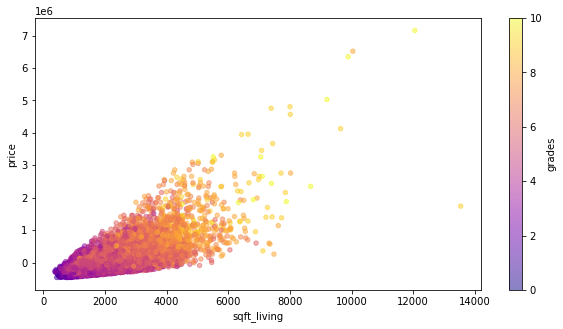

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib nbagg
%matplotlib inline

data = pd.read_csv("data/cleaned_kc_house_data.csv")
data["price"] = data["price"] - data["price"].mean()
data["grades"] = data["grades"]

fig, ax = plt.subplots(figsize=(10,5))
data.plot.scatter(x="sqft_living", y="price", c="grades", cmap="plasma", alpha=0.5, ax=ax);

In [58]:
def plot_fit_lines(data, results, column, categories, interactions, cmap="plasma"):
    # Extract some shorter variable names for readability
    x = data["sqft_living"]
    beta_0 = results.params["const"]
    beta_1 = results.params["sqft_living"]
    
    # Set up scatter plot
    fig, ax = plt.subplots(figsize=(10,5))
    data.plot.scatter(x="sqft_living", y="price", c=column, cmap=cmap, alpha=0.5, ax=ax)

    colors = cm.get_cmap(cmap)
    min_cat = data[column].min()
    max_cat = data[column].max()
    range_cat = max_cat - min_cat
    
    # For each category, calculate and graph the fit line
    for cat in categories:
        if cat in interactions:
            fit_line = beta_0 + \
                (beta_1 + results.params[f"{column}"]) * x + \
                results.params[f"{column}_{cat}"]
        else:
            fit_line = beta_0 + beta_1 * x + results.params[f"{column}_{cat}"]
            
        ax.plot(
            x,
            fit_line,
            color=colors((cat - min_cat)/range_cat),
            label=f"{column}: {cat}",
            linewidth=5,
            alpha=0.7)

    ax.legend();

TypeError: 'in <string>' requires string as left operand, not int

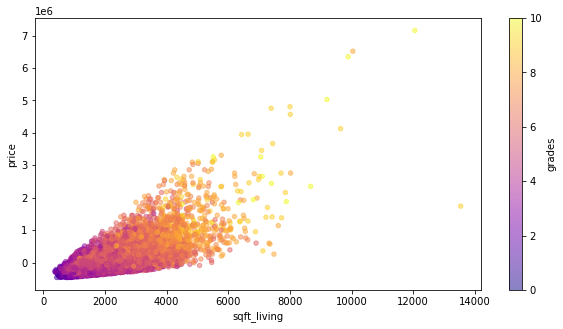

In [59]:
import statsmodels.api as sm

# Prepare data for modeling
y = data["price"]
X_no_interaction = data[["grades", "sqft_living"]].copy()
X_no_interaction = pd.get_dummies(X_no_interaction, columns=["grades"], drop_first=True)

# Build model and get results
no_interaction_model = sm.OLS(y, sm.add_constant(X_no_interaction))
no_interaction_results = no_interaction_model.fit()

# Plot the lines generated by the model for each selected category
plot_fit_lines(data, no_interaction_results, "grades", [0,1,2,3,4,5, 6,7, 8,9,10], 'plasma')